In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy.integrate import odeint
from scipy.signal import find_peaks

In [22]:
def f(x,t,g,h):
  dx_dt = np.zeros(200)
  dx1 = np.zeros(100)
  dx2 = np.zeros(100)
  x1 = x[0:100]
  x2 = x[100:200]
  dx1 = x2
  dx2 = -np.sin(x1) + g*(np.roll(x1,1) + np.roll(x1,-1)-2*x1) + h*(np.average(x1)*np.ones(100)-x1)
  dx_dt = np.hstack([dx1,dx2])
  return dx_dt

def findLocalization(entotal, energy):
    
  threshold = 0.1 * entotal  # Define the energy threshold for localization

  for n in range(energy.shape[0]):  # Iterate over time steps
    data = energy[n, :]          # Extract energy distribution at time step n
    max_energy = np.max(data)    # Find the maximum energy at this time step

    if max_energy > threshold:   # Check if the threshold is exceeded
      localization_time = n    # Record the time step
      localization_site = np.argmax(data)  # Find the pendulum with the highest energy
      return localization_time, localization_site

  # If no localization is found, return None
  return None, None
    
def boxcar(energy,snap, kernel_size = 10):
  etrace = energy[snap,:]
  offset = int(kernel_size/2)
  extrapts = etrace[0:kernel_size]
  etrace2 = np.concatenate((etrace,extrapts))
  kernel = np.ones(kernel_size) / kernel_size
  ebox1 = np.convolve(etrace2, kernel, mode='valid')
  ebox = np.roll(ebox1,offset)
  return ebox

In [24]:
#---- Parameters --------
g = 0.75
tf = 150
dt = 0.5
Nt = int(tf/dt)
#Type I instability: use h = -0.15, A = 1.25
#Type II instability: use h = 0, A = 1.2
#Type III instability: use h = +0.5, A = 1.75
h = 0.5
A = 1.75
#------------------------

#---- Initial conditions ----------------
x0 = A*np.ones(100) + 0.05*(np.random.rand(100)-0.5)
v0 = np.zeros(100)
x_0 = np.hstack([x0,v0])
t = np.arange(0,tf,dt)
#---------------------------------------

x = odeint(f, x_0, t, args=(g,h,))
theta = x[:,0:100]
dtheta = x[:,100:200]
energy =  dtheta**2 - 2*np.cos(theta) + 2*np.ones((Nt,100)) + g*(theta-np.roll(theta,-1, axis=1))**2 + h*(theta-np.average(theta,axis=1).reshape(Nt,1))**2
entotal = np.sum(energy,axis=1)

In [29]:
np.random.normal()

-0.210114526862809

np.int64(73)

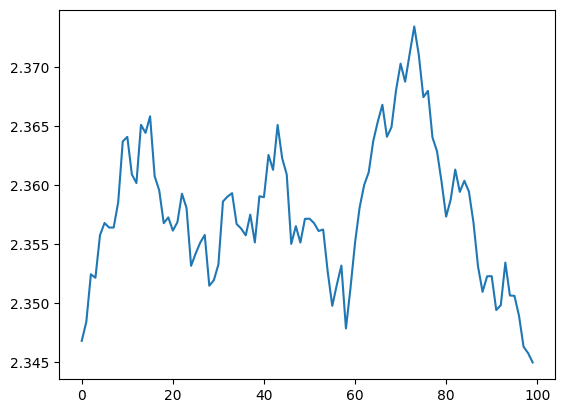

In [8]:
energy2 = [2.34678734, 2.34839844, 2.35243329, 2.35213993, 2.35575356,
       2.35678753, 2.35639971, 2.35639971, 2.35855417, 2.36371344,
       2.36409539, 2.36090722, 2.36017892, 2.36512059, 2.36443682,
       2.36584126, 2.36076063, 2.35956567, 2.35677194, 2.35726336,
       2.3561409 , 2.35685729, 2.35927344, 2.35806135, 2.35314925,
       2.35419119, 2.35511448, 2.35577445, 2.3514629 , 2.35193296,
       2.35326538, 2.35861025, 2.35902706, 2.35931979, 2.35670096,
       2.35630775, 2.3557388 , 2.35750138, 2.35514077, 2.35905493,
       2.35898205, 2.36256178, 2.36129649, 2.36510985, 2.36228821,
       2.3609035 , 2.35501234, 2.35651415, 2.35512698, 2.35713899,
       2.35715249, 2.3567749 , 2.35610866, 2.35623445, 2.35264184,
       2.34975644, 2.35154653, 2.35317153, 2.34783367, 2.35126751,
       2.35511749, 2.3580916 , 2.36001509, 2.36109452, 2.36375056,
       2.3653985 , 2.36682171, 2.36410579, 2.36492146, 2.36805363,
       2.37031187, 2.3687807 , 2.37116146, 2.37346591, 2.3710417 ,
       2.36746813, 2.36799808, 2.36405118, 2.36287061, 2.36026788,
       2.35732826, 2.35877624, 2.36132186, 2.3594304 , 2.36037156,
       2.3594539 , 2.35683092, 2.35310178, 2.3509436 , 2.35226573,
       2.35227561, 2.3493989 , 2.34981232, 2.35342863, 2.35063684,
       2.35060301, 2.34890784, 2.34628569, 2.34574021, 2.34494898]

plt.plot(energy2)
with open("energySmooth.txt", "w") as text_file:
    text_file.write(str("Smoothed Energy Data (Time = 0):" + str(energy2)))
np.argmax(energy2)

np.int64(45)

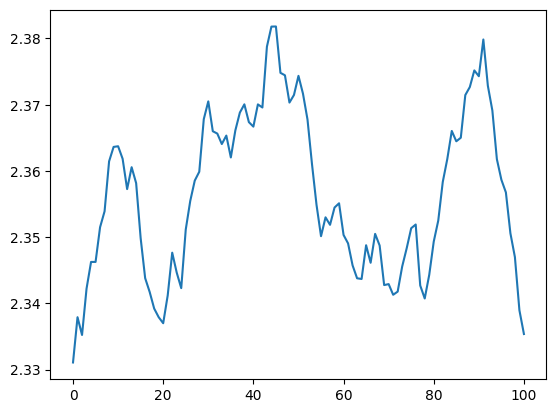

In [25]:
plt.plot(boxcar(energy,0))
with open("energySmooth.txt", "w") as text_file:
    text_file.write(str("Smoothed Energy Data (Time = 0):" + str(boxcar(energy,0))))
np.argmax(boxcar(energy,0))

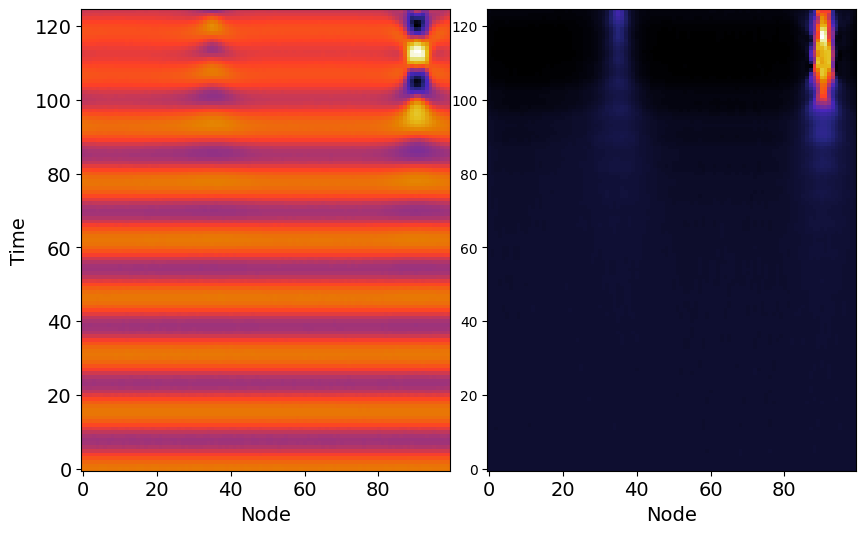

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1);
plt.imshow(theta[0:125,:], origin='lower', cmap='CMRmap')
plt.xlabel("Node",fontsize = 14)
plt.ylabel("Time",fontsize = 14)
plt.yticks(np.arange(0,121,20),fontsize = 14)
plt.tick_params(axis='y', colors='black')
plt.xticks(fontsize = 14)

plt.subplots_adjust(wspace=0.1)

plt.subplot(1,2,2);
plt.imshow(energy[0:125,:],  origin='lower', cmap='CMRmap')
plt.xlabel("Node",fontsize = 14)
plt.xticks(fontsize = 14)

#plt.savefig('colorMap.pdf', bbox_inches = 'tight')
plt.show()

## Generating the data set

In [3]:
import numpy as np
import h5py
from scipy.integrate import odeint

def generate_dataset(num_simulations, tf, dt, g, h, A_range=(1.5, 2.0), noise_level=0.025):
    """
    Generates a dataset of sine-Gordon simulations with random initial conditions.

    Parameters:
        num_simulations (int): Number of simulations to generate.
        tf (float): Total simulation time.
        dt (float): Time step for numerical integration.
        g (float): Coupling strength parameter.
        h (float): Global interaction strength parameter.
        A_range (tuple): Range of initial angular displacement amplitude (A).
        noise_level (float): Amplitude of random noise added to initial conditions.

    Returns:
        tuple: A tuple containing the time array and a dictionary of simulation data.
    """
    # Initialize an empty dictionary to store all simulation data
    dataset = {}

    # Define the number of pendulums
    N = 100

    # Define the sine-Gordon ODE function
    def f(x, t, g, h):
        dx_dt = np.zeros(2 * N)
        x1 = x[:N]  # Angular positions
        x2 = x[N:]  # Angular velocities
        dx1 = x2
        dx2 = -np.sin(x1) + g * (np.roll(x1, 1) + np.roll(x1, -1) - 2 * x1) + h * (np.average(x1) * np.ones(N) - x1)
        dx_dt = np.hstack([dx1, dx2])
        return dx_dt

    # Define the time array
    t = np.arange(0, tf, dt)

    # Store the time array in the dataset
    dataset['time_steps'] = t

    # Loop over the number of simulations
    for sim_idx in range(num_simulations):
        # Generate random initial conditions
        A = float(np.random.uniform(A_range[0], A_range[1]))  # Random amplitude within the specified range
        x0 = A * np.ones(N) + noise_level * (np.random.rand(N) - 0.5)  # Initial positions with noise
        v0 = np.zeros(N)  # Initial velocities
        x_0 = np.hstack([x0, v0])  # Combine positions and velocities into a single state vector

        # Solve the ODE
        x = odeint(f, x_0, t, args=(g, h))

        # Extract theta (positions) and dtheta (velocities)
        theta = x[:, :N]
        dtheta = x[:, N:]

        # Compute energy at each time step
        energy = (
            0.5 * dtheta**2  # Kinetic energy
            + (1 - np.cos(theta))  # Potential energy
            + g * (theta - np.roll(theta, -1, axis=1))**2  # Coupling energy
            + h * (theta - np.average(theta, axis=1).reshape(-1, 1))**2  # Global interaction energy
        )

        # Store the results for this simulation
        sim_key = f"simulation_{sim_idx}"
        dataset[sim_key] = {
            "initial_conditions": {
                "A": A,
                "noise_level": noise_level,
                "g": g,
                "h": h,
            },
            "theta": theta,
            "dtheta": dtheta,
            "energy": energy,
        }

    return dataset


def save_dataset_to_h5(dataset, filename):
    """
    Saves the dataset to an HDF5 file.

    Parameters:
        dataset (dict): The dataset generated by `generate_dataset`.
        filename (str): The name of the HDF5 file to save the dataset.
    """
    with h5py.File(filename, 'w') as hf:
        # Save global time steps
        hf.create_dataset("time_steps", data=dataset.pop("time_steps"))

        # Save each simulation group
        for sim_key, sim_data in dataset.items():
            sim_group = hf.create_group(sim_key)
            
            # Save initial conditions
            ic_group = sim_group.create_group("initial_conditions")
            for key, value in sim_data["initial_conditions"].items():
                ic_group.attrs[key] = value
            
            # Save numerical arrays
            sim_group.create_dataset("theta", data=sim_data["theta"])
            sim_group.create_dataset("dtheta", data=sim_data["dtheta"])
            sim_group.create_dataset("energy", data=sim_data["energy"])


In [4]:

dataset = generate_dataset(
    num_simulations=10000,
    tf=150.0,
    dt=1.0,
    g=0.75,
    h=0.5,
    A_range=(1.65, 1.85),
    noise_level=0.025
)
    
# Save the dataset to an HDF5 file
save_dataset_to_h5(dataset, "sine_gordon_dataset.h5")

Verifying the number of simulations

In [10]:
import h5py

# Open the HDF5 file in read mode
filename = "sine_gordon_dataset.h5"
with h5py.File(filename, 'r') as hf:
    # List all keys in the file
    all_keys = list(hf.keys())
    
    # Filter keys to find simulation groups
    simulation_keys = [key for key in all_keys if key.startswith("simulation_")]
    
    # Count the number of simulations
    num_simulations = len(simulation_keys)
    
    print(f"Number of simulations in the file: {num_simulations}")

Number of simulations in the file: 10000


## Adding the target variable (the time and node where localization occured in each simulation)

In [6]:
import h5py
import numpy as np

def find_localization_location(energy_data, threshold):
    """
    Finds the first instance of energy localization in a simulation.

    Parameters:
        energy_data (np.ndarray): Energy values for all pendulums over time.
        threshold (float): Energy threshold for localization.

    Returns:
        int: The index of the pendulum where localization occurs.
        float: The timestamp when localization occurs.
    """
    # Iterate over time steps to find the first instance of localization
    for t_idx, energy_at_t in enumerate(energy_data):
        # Find the pendulum with energy exceeding the threshold
        max_energy = np.max(energy_at_t)
        if max_energy > threshold:
            localized_pendulum = np.argmax(energy_at_t)  # Index of the pendulum
            return localized_pendulum, t_idx  # Return pendulum index and time step
    
    # If no localization is found, return None
    return None, None


def add_localization_targets_to_h5(filename, threshold_fraction=0.1):
    """
    Iterates over simulations in the HDF5 file, finds the localization location,
    and stores it as a target variable in the file.

    Parameters:
        filename (str): Path to the HDF5 file.
        threshold_fraction (float): Fraction of total energy to use as the localization threshold.
    """
    with h5py.File(filename, 'r+') as hf:
        # Get the total number of pendulums (N) from the first simulation's theta shape
        sim_key = next(key for key in hf.keys() if key.startswith("simulation_"))
        N = hf[f"{sim_key}/theta"].shape[1]
        
        # Iterate over each simulation group
        for sim_key in hf.keys():
            if sim_key.startswith("simulation_"):
                sim_group = hf[sim_key]
                
                # Load energy data for the simulation
                energy_data = sim_group['energy'][:]
                
                # Calculate the threshold energy (10% of total energy)
                total_energy = np.sum(energy_data[0])  # Total energy is conserved
                threshold = threshold_fraction * total_energy
                
                # Find the localization location and time
                localized_pendulum, localization_time = find_localization_location(energy_data, threshold)
                
                # Store the results as attributes in the simulation group
                sim_group.attrs['localized_pendulum'] = localized_pendulum
                sim_group.attrs['localization_time'] = localization_time

                print(f"Simulation {sim_key}: Localization at pendulum {localized_pendulum} at time step {localization_time}")

In [7]:
# Add localization targets to the HDF5 file
add_localization_targets_to_h5("sine_gordon_dataset.h5", threshold_fraction=0.1)

Simulation simulation_0: Localization at pendulum 78 at time step 50
Simulation simulation_1: Localization at pendulum 78 at time step 78
Simulation simulation_10: Localization at pendulum 68 at time step 89
Simulation simulation_100: Localization at pendulum 19 at time step 59
Simulation simulation_1000: Localization at pendulum 78 at time step 63
Simulation simulation_1001: Localization at pendulum 53 at time step 43
Simulation simulation_1002: Localization at pendulum 1 at time step 56
Simulation simulation_1003: Localization at pendulum 44 at time step 52
Simulation simulation_1004: Localization at pendulum 86 at time step 59
Simulation simulation_1005: Localization at pendulum 14 at time step 50
Simulation simulation_1006: Localization at pendulum 69 at time step 78
Simulation simulation_1007: Localization at pendulum 77 at time step 49
Simulation simulation_1008: Localization at pendulum 6 at time step 54
Simulation simulation_1009: Localization at pendulum 66 at time step 49
Sim

In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def analyze_localization_distribution(filename):
    """
    Analyzes the distribution of localization nodes across all simulations in the HDF5 file.

    Parameters:
        filename (str): Path to the HDF5 file.
    """
    # Initialize a dictionary to store the frequency of each node being a localization site
    localization_counts = {}

    # Open the HDF5 file in read mode
    with h5py.File(filename, 'r') as hf:
        # Iterate over each simulation group
        for sim_key in hf.keys():
            if sim_key.startswith("simulation_"):
                sim_group = hf[sim_key]
                
                # Check if the localization information exists
                if 'localized_pendulum' in sim_group.attrs:
                    localized_pendulum = sim_group.attrs['localized_pendulum']
                    
                    # Increment the count for this node
                    if localized_pendulum is not None:
                        if localized_pendulum in localization_counts:
                            localization_counts[localized_pendulum] += 1
                        else:
                            localization_counts[localized_pendulum] = 1

    # Convert the dictionary to a sorted list of tuples for visualization
    sorted_counts = sorted(localization_counts.items(), key=lambda x: x[0])

    # Extract node indices and their counts
    nodes = [item[0] for item in sorted_counts]
    counts = [item[1] for item in sorted_counts]

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    plt.bar(nodes, counts, color='skyblue', edgecolor='black')
    plt.xlabel('Node Index')
    plt.ylabel('Frequency')
    plt.title('Distribution of Localization Nodes')
    plt.xticks(range(0, max(nodes) + 1, 10))  # Adjust x-ticks for clarity
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

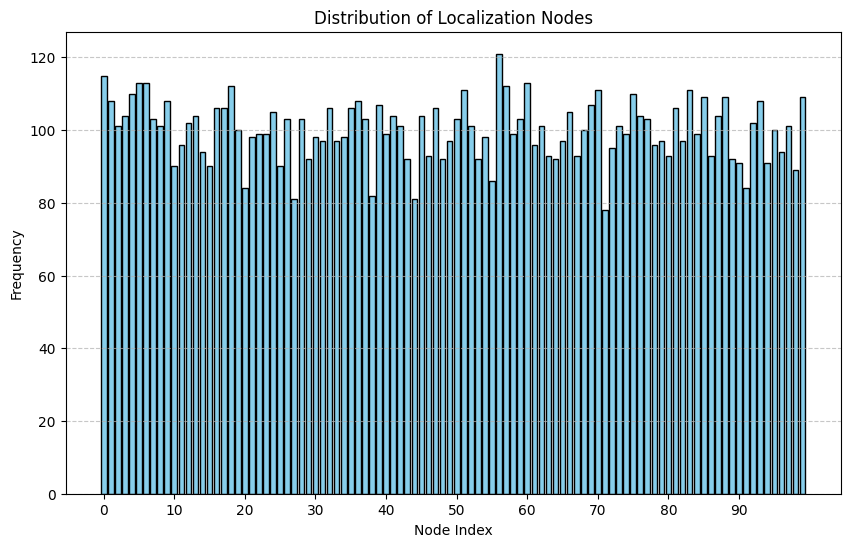

In [12]:
filename = "sine_gordon_dataset.h5"
analyze_localization_distribution(filename)